In [1]:
# Import necessary libraries
import pandas as pd         # Pandas for data manipulation and analysis
import numpy as np          # NumPy for numerical operations
import matplotlib.pyplot as plt     # Matplotlib for data visualization
import seaborn as sns       # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split   # Scikit-learn for machine learning tasks


In [2]:
CC_data = pd.read_csv("/kaggle/input/creditcard/creditcard.csv")

CC_data.head(10) #Displaying the first 10 rows of the credit card data for general view.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
CC_data[["Time","Amount"]]

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [4]:
###The dataset we currently have has 31 variables, including the variable we're aiming for:
#class. Between 0 and 1, fraud is represented by 1. The 28 V variables, Time, and
#Amount make up the final set of variables. To safeguard client information, the V
#variables are the outcome of a PCA (dimensionality reduction) transformation.
#Therefore, in this project, we wouldn't have the information to offer a really
#comprehensible result. Instead, we'll concentrate on the evaluations and strategies we
#may use to cope with unbalanced datasets

In [5]:
#used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

CC_data.describe(include='all') #Describing all columns of a DataFrame regardless of data type.(This is just for reference)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

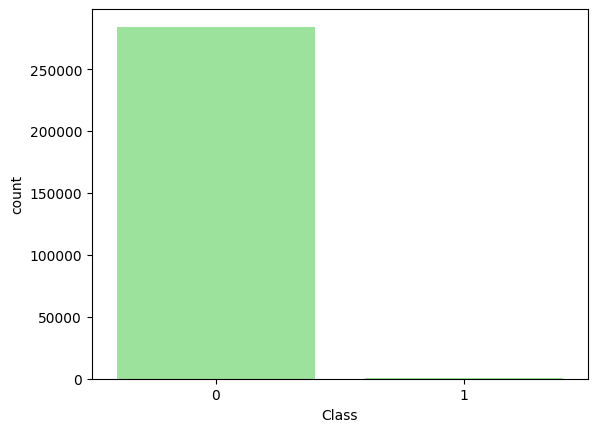

In [6]:
# Displaying the "Class" count using countplot. 0 => valid transaction 1=> Fraud detection.
sns.countplot(x=CC_data["Class"],color = "lightgreen")  

In [7]:
# Displaying the count in numerical format.  0 => valid transaction 1=> Fraud detection.
CC_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Time', ylabel='Count'>

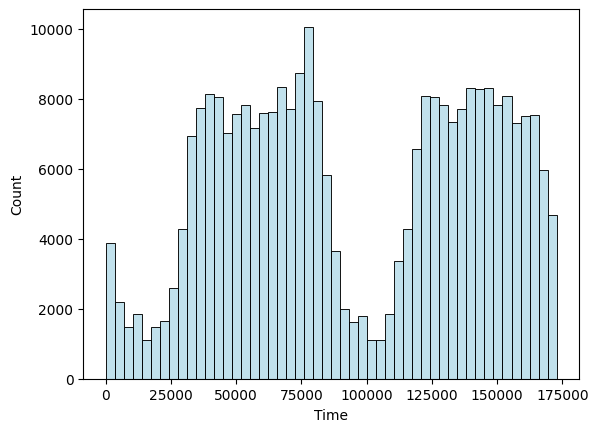

In [8]:
#Similar to above plotting the Time clomun and displaying the values using HISTPLOT. 
# X AXIS --> TIME Y AXIS ---> COUNT.

sns.histplot(x = CC_data["Time"], color= 'lightblue' ,bins=50)

<Axes: xlabel='Amount', ylabel='Count'>

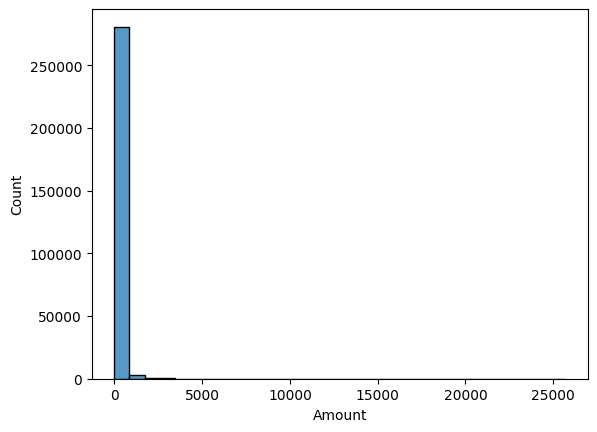

In [9]:
#Similar to above plotting the AMOUNT clomun and displaying the values using HISTPLOT. 
# X AXIS --> AMOUNT Y AXIS ---> COUNT.

sns.histplot(x=CC_data["Amount"], bins=30)

In [10]:
# y =====> Inserting Class data i;e "0" and "1".
# x =====> Rest of the data apart from class column.
y = CC_data.Class
X = CC_data.drop('Class', axis=1)  




In [11]:
#Splitting the data into two part Train and test.
#Setting the seed to "42" as 42 is the general used value for random state across all over place.
# Using stratify to obtain the same proportion of data when compared to original dataset.

X, Res_X, y, Res_y = train_test_split(X,y, test_size=0.20, random_state=42,stratify=y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [13]:
#Obtainning the relative requency for  Train_data and Test_data of class 
y_test.value_counts(normalize=True)


Class
0    0.998266
1    0.001734
Name: proportion, dtype: float64

In [14]:
y_train.value_counts(normalize=True)
#Both results in same proportion for "0's and 1's"


Class
0    0.998272
1    0.001728
Name: proportion, dtype: float64

<Axes: xlabel='Amount_scaled', ylabel='Count'>

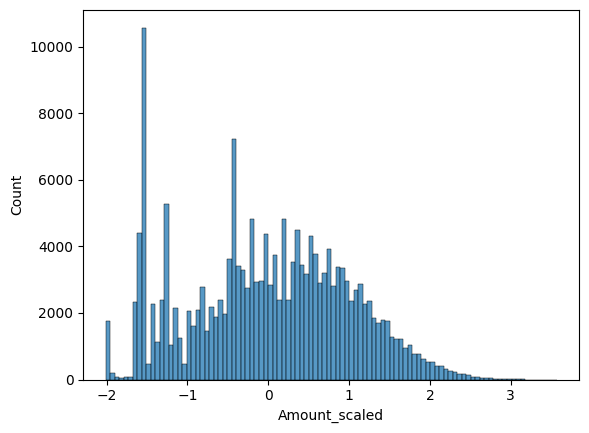

In [15]:
from sklearn.preprocessing import PowerTransformer
#instantiate power transformer
pt_amount = PowerTransformer()

#transform amount 
X_train['Amount_scaled'] = pt_amount.fit_transform(X_train['Amount'].values.reshape(-1,1))
sns.histplot(data=X_train, x="Amount_scaled", bins=100)

<Axes: xlabel='Time_scaled', ylabel='Count'>

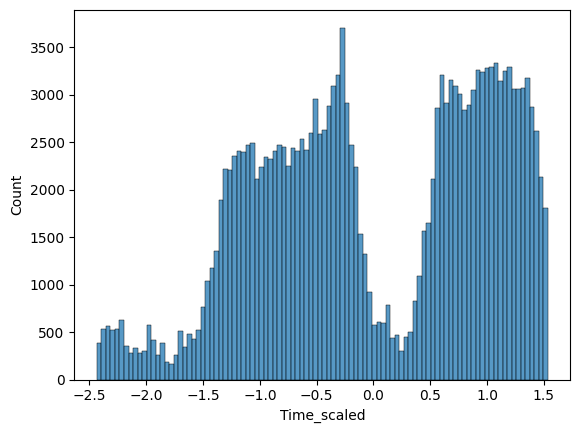

In [16]:
#instantiate power transformer
pt_time = PowerTransformer()

#transform time
X_train['Time_scaled'] = pt_time.fit_transform(X_train['Time'].values.reshape(-1,1))
sns.histplot(data=X_train, x="Time_scaled", bins=100)

In [17]:
#drop origianl time and amount
X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
1458,-0.441959,1.080868,1.410925,0.096693,0.135221,-0.706547,0.666114,0.013606,-0.507651,-0.573054,...,-0.202324,-0.469792,0.065107,0.364271,-0.253785,0.079310,0.263524,0.100546,-0.617401,-2.352207
119883,1.226589,0.169271,0.326460,0.493162,-0.123181,-0.313537,-0.009737,-0.048594,0.058451,-0.114385,...,-0.247942,-0.696903,0.113911,-0.289866,0.190943,0.145525,-0.014312,0.013489,-0.429044,-0.336686
177219,1.708188,-0.698579,-0.964903,0.474704,-0.260791,0.238362,-0.589549,0.055753,1.165361,-0.644487,...,0.031552,-0.082551,0.077579,-0.017251,-0.472592,0.362583,-0.016077,0.022792,1.194570,0.620684
191980,2.096642,0.093645,-2.159035,0.955814,1.070886,-0.064135,0.432008,-0.123855,0.193407,0.462788,...,-0.005335,0.152805,-0.165407,-1.468552,0.579626,-0.417287,-0.025580,-0.089699,-1.536284,0.742462
252575,-0.569459,-0.956243,2.007415,-1.590362,-0.186744,-0.842440,-0.697689,-0.005533,1.951300,-1.190054,...,0.366197,1.234458,-0.000220,0.030027,-0.725066,-0.083545,0.068478,-0.007934,0.004332,1.231339


In [18]:
X_train[["Amount_scaled","Time_scaled"]]

,Amount_scaled,Time_scaled
1458,-0.617401,-2.352207
119883,-0.429044,-0.336686
177219,1.194570,0.620684
191980,-1.536284,0.742462
252575,0.004332,1.231339
...,...,...
24156,-1.472141,-1.325720
258612,0.337410,1.283192
19453,0.764521,-1.398718
129088,-0.935780,-0.265839


In [19]:
#transform Amount and Time for testing data
X_test['Amount_scaled'] = pt_amount.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Time_scaled'] = pt_time.transform(X_test['Time'].values.reshape(-1,1))

X_test = X_test.drop(['Time', 'Amount'], axis=1)
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
131037,0.810459,-0.449732,0.761882,1.223866,-0.599514,0.405458,-0.258306,0.184438,0.224598,-0.077159,...,0.297067,0.723396,-0.257988,0.067262,0.501125,-0.229682,0.041048,0.043297,1.149211,-0.254380
86287,-1.573125,1.651239,0.533822,1.660883,0.446291,-0.520434,0.252038,0.267729,-0.889728,-0.500364,...,0.034391,0.231540,-0.401189,-0.017498,0.275526,-0.105129,-0.801550,-0.472674,-1.536284,-0.653458
106692,-1.621135,1.069174,0.400662,-0.143960,0.476378,1.785175,-0.378176,1.461956,-0.258619,-1.009353,...,-0.024787,0.024758,0.026961,-1.782912,-0.179868,0.413630,0.031201,-0.034294,-0.129354,-0.456322
263003,1.770382,-0.982631,-1.873408,-0.492799,1.669818,3.839224,-1.057777,0.988093,0.858680,0.064503,...,0.254618,0.512556,0.120333,0.744751,-0.289511,0.365235,-0.014526,-0.031004,0.986832,1.319630
151514,-1.541422,0.918360,0.689916,-0.208608,0.802992,-0.078178,0.611336,0.017869,2.313409,-0.179916,...,-0.723576,-0.863090,0.288729,0.526238,0.235326,0.093499,0.790083,0.271762,-2.003988,0.079867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248721,-0.042113,1.062608,-1.066365,-0.272825,0.504088,-0.790420,0.620572,0.292330,-0.430458,-1.022093,...,0.379291,0.993332,-0.129377,-0.572529,-0.308847,-0.142845,-0.020087,0.025175,0.346221,1.198518
272603,1.569832,-2.563506,-3.378773,-1.390367,-0.420200,-0.971501,0.496744,-0.602455,-1.813648,1.590332,...,0.321321,0.300539,-0.581273,0.110527,0.525896,0.266218,-0.176440,-0.011909,1.746440,1.399057
90858,-1.392793,1.713418,0.883774,-0.088019,0.009326,-0.953382,0.331914,-0.854835,0.209189,0.501640,...,0.383501,-0.989972,0.056711,0.323866,0.017462,0.094137,0.641718,0.291510,-0.571701,-0.607750
194445,-1.632049,1.111050,-0.065752,-0.456093,-1.443068,-0.923432,-0.443064,1.201000,-0.693018,-0.789701,...,-0.202975,-1.128435,0.340078,0.464302,-1.332359,0.713828,-0.468095,-0.146275,0.731481,0.763307


In [20]:
from sklearn.utils import resample

In [21]:
y_train.value_counts()


Class
0    181961
1       315
Name: count, dtype: int64

In [22]:
X_concat = pd.concat([X_train, y_train], axis=1)
X_concat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,Class
1458,-0.441959,1.080868,1.410925,0.096693,0.135221,-0.706547,0.666114,0.013606,-0.507651,-0.573054,...,-0.469792,0.065107,0.364271,-0.253785,0.079310,0.263524,0.100546,-0.617401,-2.352207,0
119883,1.226589,0.169271,0.326460,0.493162,-0.123181,-0.313537,-0.009737,-0.048594,0.058451,-0.114385,...,-0.696903,0.113911,-0.289866,0.190943,0.145525,-0.014312,0.013489,-0.429044,-0.336686,0
177219,1.708188,-0.698579,-0.964903,0.474704,-0.260791,0.238362,-0.589549,0.055753,1.165361,-0.644487,...,-0.082551,0.077579,-0.017251,-0.472592,0.362583,-0.016077,0.022792,1.194570,0.620684,0
191980,2.096642,0.093645,-2.159035,0.955814,1.070886,-0.064135,0.432008,-0.123855,0.193407,0.462788,...,0.152805,-0.165407,-1.468552,0.579626,-0.417287,-0.025580,-0.089699,-1.536284,0.742462,0
252575,-0.569459,-0.956243,2.007415,-1.590362,-0.186744,-0.842440,-0.697689,-0.005533,1.951300,-1.190054,...,1.234458,-0.000220,0.030027,-0.725066,-0.083545,0.068478,-0.007934,0.004332,1.231339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24156,0.016195,0.837004,1.412539,1.702548,-0.617590,0.261030,-0.535771,-1.523846,0.150172,-0.082094,...,-0.160930,-0.005084,0.633019,0.803724,-0.087087,0.269657,0.239345,-1.472141,-1.325720,0
258612,-3.385850,3.249002,-2.246492,0.993333,-0.729694,0.947889,-2.819625,-3.795863,-1.957584,-1.777189,...,1.282028,-0.045040,0.039099,0.605973,1.199836,-0.763545,-0.077492,0.337410,1.283192,0
19453,-1.737090,-0.890132,3.420714,0.395711,-0.067610,-0.335518,-0.215682,0.302557,1.503359,-1.180929,...,-0.034168,-0.031295,0.659424,0.629384,-0.565606,-0.144327,-0.131447,0.764521,-1.398718,0
129088,-0.637908,1.143421,2.017952,-0.058035,0.144581,-0.646670,0.973703,-0.297624,-0.487969,-0.110895,...,-0.209624,-0.008196,0.627083,-0.378823,0.019724,0.036641,-0.044300,-0.935780,-0.265839,0


In [23]:
not_fraud = X_concat[X_concat.Class==0]
fraud = X_concat[X_concat.Class==1]
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,Class
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,...,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,-0.629980,-0.021154,1
150666,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,0.753727,0.043979,1
154718,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,-7.334377,...,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,-2.010904,0.221622,1
61787,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,-2.892612,...,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1.597675,-0.910308,1
154587,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,...,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,-2.010904,0.210536,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112840,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,0.334533,...,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,0.439917,-0.396773,1
16863,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,-3.651427,...,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,1.971481,-1.453325,1
150687,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,3.840170,-4.358441,-14.533162,...,1.041642,-0.682790,0.573544,-1.602389,-0.393521,-0.468893,0.105920,-1.536284,0.044733,1
191074,-1.836940,-1.646764,-3.381168,0.473354,0.074243,-0.446751,3.791907,-1.351045,0.095186,-0.084500,...,1.786681,-0.151178,-0.582098,-0.956062,-0.334369,0.715600,0.370450,1.964271,0.735113,1


In [24]:
# oversample fraud transaction (minority)
fraud_oversampled = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=42) # with replacement

# combine majority and oversampled minority
oversampled = pd.concat([not_fraud, fraud_oversampled])

#split X and y
y_train_oversampled = oversampled.Class
X_train_oversampled = oversampled.drop('Class', axis=1)

# check new class counts
oversampled.Class.value_counts()

Class
0    181961
1    181961
Name: count, dtype: int64

In [25]:
# undersample not fraud (majority)
not_fraud_undersampled = resample(not_fraud, replace=False, n_samples=len(fraud), random_state=42) #without replacement

# combine undersampled majority and minority
undersampled = pd.concat([not_fraud_undersampled, fraud])

#split X and y
y_train_undersampled = undersampled.Class
X_train_undersampled = undersampled.drop('Class', axis=1)

# check new class counts
undersampled.Class.value_counts()

Class
0    315
1    315
Name: count, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

y_train_sm.value_counts()

Class
0    181961
1    181961
Name: count, dtype: int64

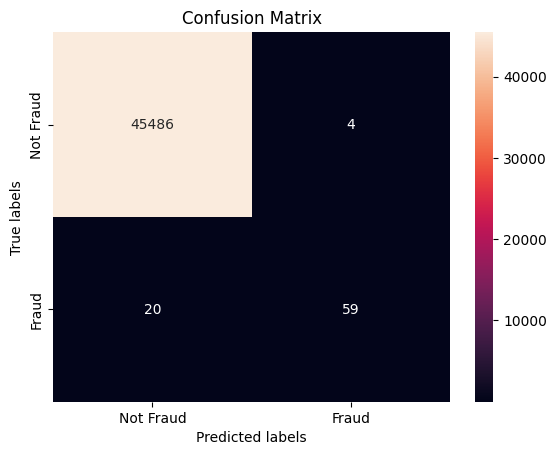

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rand_f = RandomForestClassifier(random_state=42)
rand_f.fit(X_train, y_train)
rand_f_pred = rand_f.predict(X_test)

#build confusion matrix
rand_f_cm = confusion_matrix(y_test, rand_f_pred)

ax= plt.subplot()
sns.heatmap(rand_f_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rand_f_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.94      0.75      0.83        79

    accuracy                           1.00     45569
   macro avg       0.97      0.87      0.92     45569
weighted avg       1.00      1.00      1.00     45569



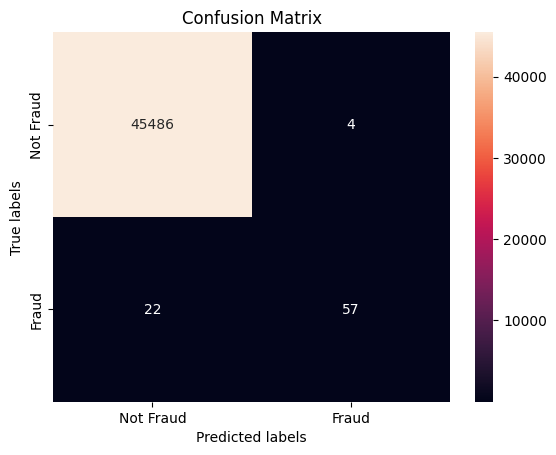

In [29]:
#RandomForestClassifier with oversampled data
rfm_OS = RandomForestClassifier(random_state=42)

rfm_OS.fit(X_train_oversampled, y_train_oversampled)
rfm_OS_pred = rfm_OS.predict(X_test)

#build confusion matrix.
rfm_OS_cm = confusion_matrix(y_test, rfm_OS_pred)

ax= plt.subplot()
sns.heatmap(rfm_OS_cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [30]:
#Printing the classification report for Over_sampling technique.

print(classification_report(y_test, rfm_OS_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.93      0.72      0.81        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569



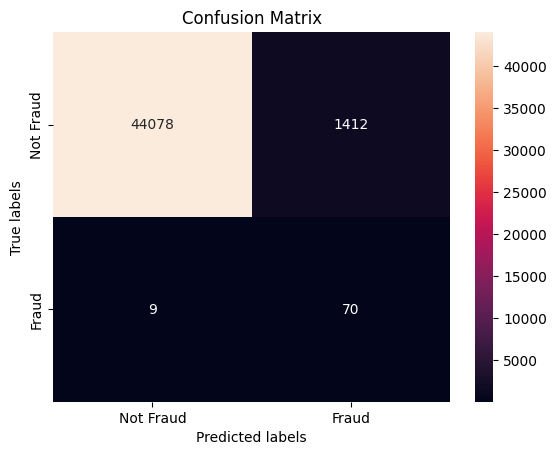

In [31]:
#RFM with undersampled data
rfm_US = RandomForestClassifier(random_state=42)

rfm_US.fit(X_train_undersampled, y_train_undersampled)
rfm_US_pred = rfm_US.predict(X_test)

#build confusion matrix
rfm_US_cm = confusion_matrix(y_test, rfm_US_pred)

ax= plt.subplot()
sns.heatmap(rfm_US_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [32]:
#Printing the classification report for Under_sampling technique.

print(classification_report(y_test, rfm_US_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     45490
           1       0.05      0.89      0.09        79

    accuracy                           0.97     45569
   macro avg       0.52      0.93      0.54     45569
weighted avg       1.00      0.97      0.98     45569



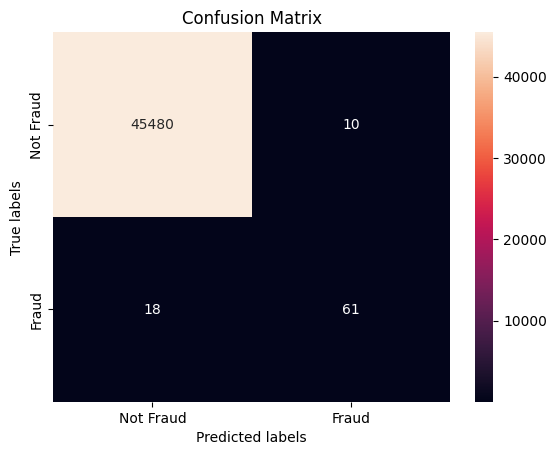

In [33]:
#RandomForestClassifier with SMOTE Technique
rfm_sm = RandomForestClassifier(random_state=42)

rfm_sm.fit(X_train_sm, y_train_sm)
rfm_sm_pred = rfm_sm.predict(X_test)

#build confusion matrix
rfm_sm_cm = confusion_matrix(y_test, rfm_sm_pred)

ax= plt.subplot()
sns.heatmap(rfm_sm_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [34]:
#Printing the classification report for SMOTE technique.
print(classification_report(y_test, rfm_sm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.86      0.77      0.81        79

    accuracy                           1.00     45569
   macro avg       0.93      0.89      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [35]:
from sklearn.metrics import precision_recall_fscore_support

#Taking values of all models for comparision.  
predicted_values = {"RandomForest": rand_f_pred, "RandomForest OS": rfm_OS_pred, "RandomForest US": rfm_US_pred, "RandomForest SMOTE": rfm_sm_pred}

#create Compare_df
Compare_df = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#For each model we are adding precision recall and f1_score into the dataframe 
for key, value in predicted_values.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    Compare_df = pd.concat([Compare_df, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

Compare_df= Compare_df.set_index('model')
Compare_df.head()

,precision,recall,f1_score
model,,,
RandomForest,0.936508,0.746835,0.830986
RandomForest OS,0.934426,0.721519,0.814286
RandomForest US,0.047233,0.886076,0.089686
RandomForest SMOTE,0.859155,0.772152,0.813333


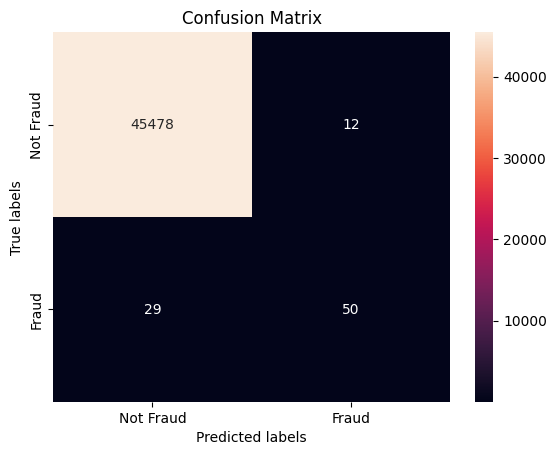

In [36]:
#build adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

#build confusion matrix
ada_cm = confusion_matrix(y_test, ada_pred)

ax= plt.subplot()
sns.heatmap(ada_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [37]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.81      0.63      0.71        79

    accuracy                           1.00     45569
   macro avg       0.90      0.82      0.85     45569
weighted avg       1.00      1.00      1.00     45569



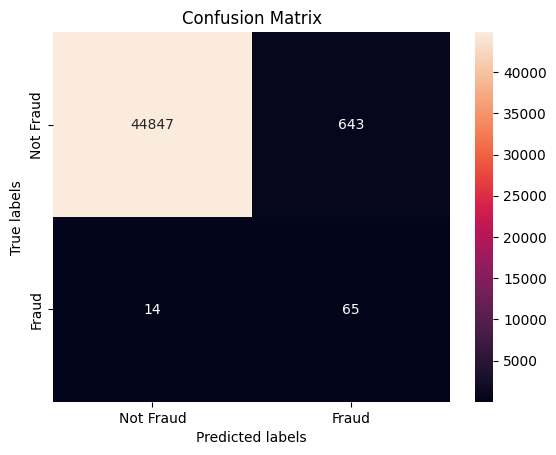

In [38]:
#build adaboost classifier with oversampled data

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train_oversampled, y_train_oversampled)
ada_pred_os = ada.predict(X_test)

#build confusion matrix
ada_cm = confusion_matrix(y_test, ada_pred_os)

ax= plt.subplot()
sns.heatmap(ada_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [39]:
print(classification_report(y_test, ada_pred_os))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45490
           1       0.09      0.82      0.17        79

    accuracy                           0.99     45569
   macro avg       0.55      0.90      0.58     45569
weighted avg       1.00      0.99      0.99     45569



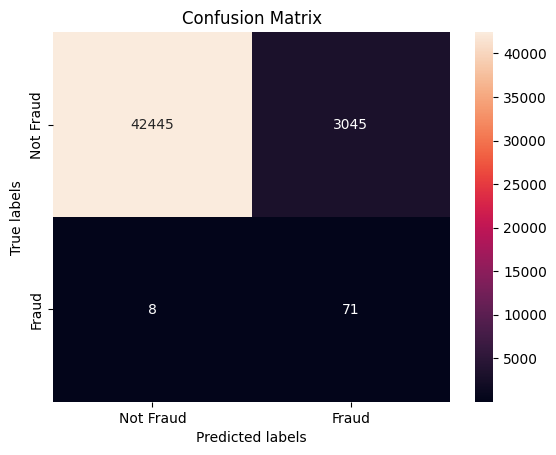

In [40]:
#build adaboost classifier with undersampled data

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train_undersampled, y_train_undersampled)
ada_pred_us = ada.predict(X_test)

#build confusion matrix
ada_cm = confusion_matrix(y_test, ada_pred_us)

ax= plt.subplot()
sns.heatmap(ada_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [41]:
print(classification_report(y_test, ada_pred_us))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     45490
           1       0.02      0.90      0.04        79

    accuracy                           0.93     45569
   macro avg       0.51      0.92      0.50     45569
weighted avg       1.00      0.93      0.96     45569



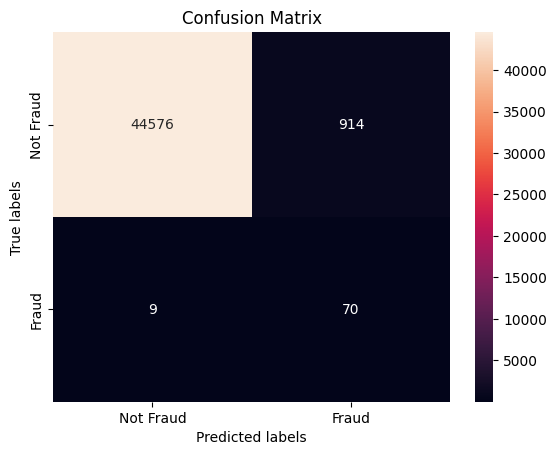

In [42]:
#build adaboost classifier with  SMOTE Technique

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train_sm, y_train_sm)
ada_pred_sm = ada.predict(X_test)

#build confusion matrix
ada_cm = confusion_matrix(y_test, ada_pred_sm)

ax= plt.subplot()
sns.heatmap(ada_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [43]:
print(classification_report(y_test, ada_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.07      0.89      0.13        79

    accuracy                           0.98     45569
   macro avg       0.54      0.93      0.56     45569
weighted avg       1.00      0.98      0.99     45569



In [44]:

#model dictionary
predicted_values_ada = {"AdaBoost": ada_pred, "AdaBoostClassifier OS": ada_pred_os, "AdaBoostClassifier US": ada_pred_us, "AdaBoostClassifier SMOTE": ada_pred_sm}

#create df
df12 = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_ada.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    df12 = pd.concat([df12, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df12 = df12.set_index('model')
df12.head()

,precision,recall,f1_score
model,,,
AdaBoost,0.806452,0.632911,0.709220
AdaBoostClassifier OS,0.091808,0.822785,0.165184
AdaBoostClassifier US,0.022786,0.898734,0.044444
AdaBoostClassifier SMOTE,0.071138,0.886076,0.131703


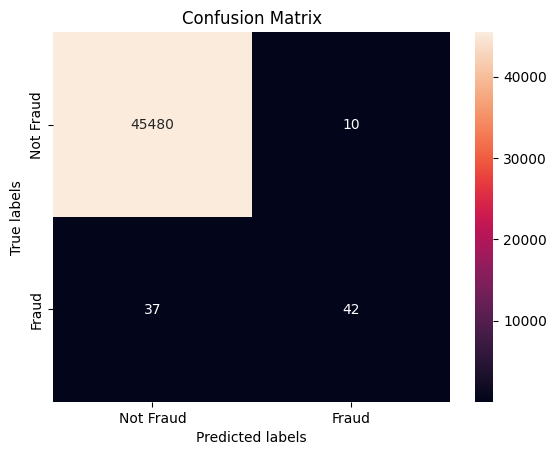

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

#build confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred)

ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']);
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [46]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.81      0.53      0.64        79

    accuracy                           1.00     45569
   macro avg       0.90      0.77      0.82     45569
weighted avg       1.00      1.00      1.00     45569



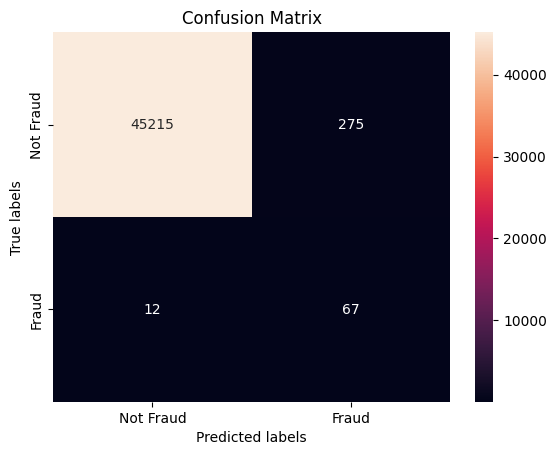

In [47]:
#Working with GradientBoostingClassifier oversampled

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train_oversampled, y_train_oversampled)
gb_pred_os = gb.predict(X_test)

#build confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred_os)

ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [48]:
print(classification_report(y_test, gb_pred_os))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45490
           1       0.20      0.85      0.32        79

    accuracy                           0.99     45569
   macro avg       0.60      0.92      0.66     45569
weighted avg       1.00      0.99      1.00     45569



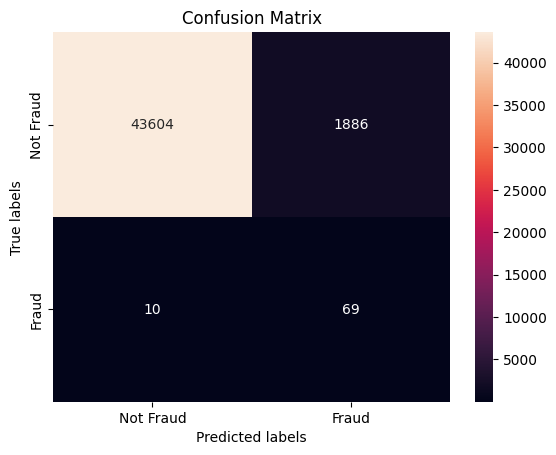

In [49]:
#Working with GradientBoostingClassifier undersampled

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train_undersampled, y_train_undersampled)
gb_pred_us = gb.predict(X_test)

#build confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred_us)

ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [50]:
print(classification_report(y_test, gb_pred_us))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45490
           1       0.04      0.87      0.07        79

    accuracy                           0.96     45569
   macro avg       0.52      0.92      0.52     45569
weighted avg       1.00      0.96      0.98     45569



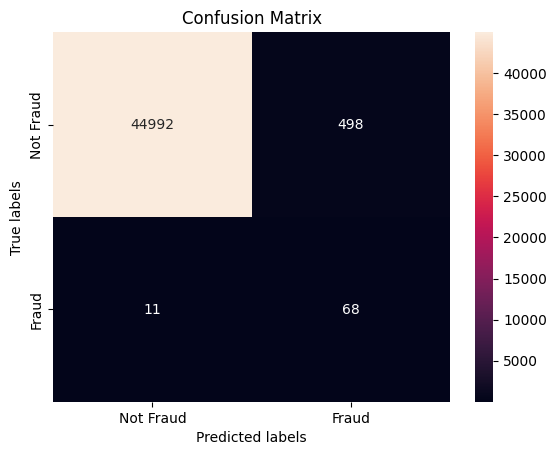

In [51]:
#Working with GradientBoostingClassifier SMOTE  technique.   

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train_sm, y_train_sm)
gb_pred_sm = gb.predict(X_test)

#build confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred_sm)

ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [52]:
print(classification_report(y_test, gb_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45490
           1       0.12      0.86      0.21        79

    accuracy                           0.99     45569
   macro avg       0.56      0.92      0.60     45569
weighted avg       1.00      0.99      0.99     45569



In [53]:

#model dictionary
predicted_values_GB = {"GradientBoosting": gb_pred, "GradientBoosting OS": gb_pred_os, "GradientBoosting US": gb_pred_us, "GradientBoosting SMOTE": gb_pred_sm}

#create df
df1 = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_GB.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    df1 = pd.concat([df1, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df1 = df1.set_index('model')
df1.head()

,precision,recall,f1_score
model,,,
GradientBoosting,0.807692,0.531646,0.641221
GradientBoosting OS,0.195906,0.848101,0.318290
GradientBoosting US,0.035294,0.873418,0.067847
GradientBoosting SMOTE,0.120141,0.860759,0.210853


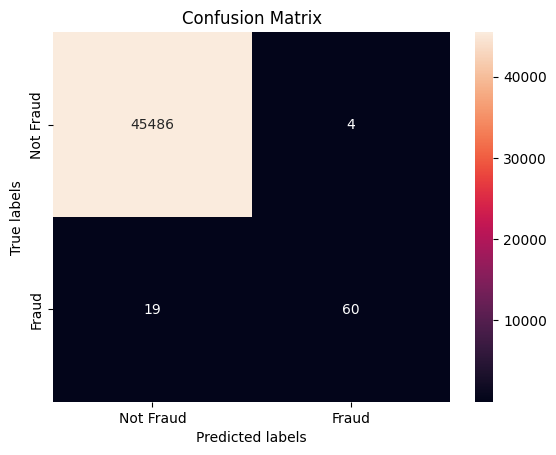

In [54]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

# make predictions on the testing data
xgb_pred = xgb_model.predict(X_test)

# build confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)


ax = plt.subplot()
sns.heatmap(xgb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); 
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [55]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.94      0.76      0.84        79

    accuracy                           1.00     45569
   macro avg       0.97      0.88      0.92     45569
weighted avg       1.00      1.00      1.00     45569



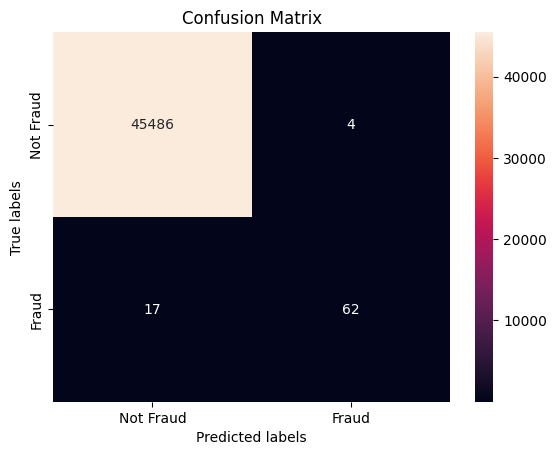

In [56]:
#For xgb_model oversmapling 

xgb_model.fit(X_train_oversampled, y_train_oversampled)
xgb_model_pred_os = xgb_model.predict(X_test)

#build confusion matrix
xgb_model_cm = confusion_matrix(y_test, xgb_model_pred_os)

ax= plt.subplot()
sns.heatmap(xgb_model_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']);
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [57]:
print(classification_report(y_test, xgb_model_pred_os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.94      0.78      0.86        79

    accuracy                           1.00     45569
   macro avg       0.97      0.89      0.93     45569
weighted avg       1.00      1.00      1.00     45569



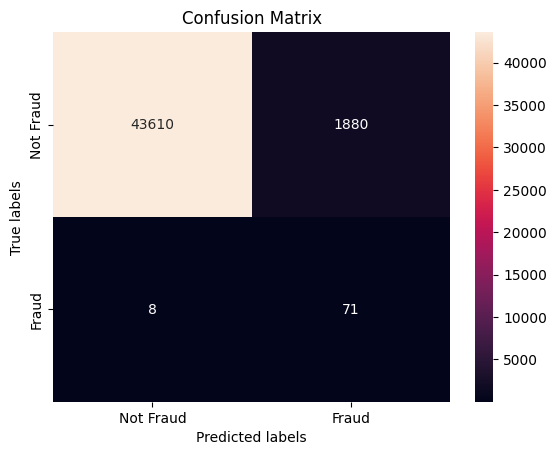

In [58]:
#Working with xgboost undersampled


xgb_model.fit(X_train_undersampled, y_train_undersampled)
xgb_model_pred_us = xgb_model.predict(X_test)

#build confusion matrix
xgb_model_cm = confusion_matrix(y_test, xgb_model_pred_us)

ax= plt.subplot()
sns.heatmap(xgb_model_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); 
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [59]:
print(classification_report(y_test, xgb_model_pred_us))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45490
           1       0.04      0.90      0.07        79

    accuracy                           0.96     45569
   macro avg       0.52      0.93      0.52     45569
weighted avg       1.00      0.96      0.98     45569



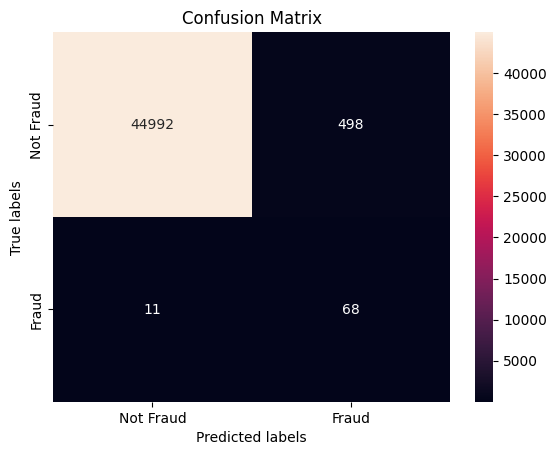

In [60]:
#Working with XGB SMOTE  technique.   


xgb_model.fit(X_train_sm, y_train_sm)
xgb_model_pred_sm = xgb_model.predict(X_test)

#build confusion matrix
xgb_model_cm = confusion_matrix(y_test, xgb_model_pred_sm)

ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); 
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);

In [61]:
print(classification_report(y_test, xgb_model_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.78      0.78      0.78        79

    accuracy                           1.00     45569
   macro avg       0.89      0.89      0.89     45569
weighted avg       1.00      1.00      1.00     45569



In [62]:

#model dictionary
predicted_values_XGB = {"xgboost": xgb_pred, "xgboost OS": xgb_model_pred_os, "xgboost US": xgb_model_pred_us, "xgboost SMOTE": xgb_model_pred_sm}

#create df
df_xgboost = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_XGB.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    df_xgboost = pd.concat([df_xgboost, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df_xgboost = df_xgboost.set_index('model')
df_xgboost.head()

,precision,recall,f1_score
model,,,
xgboost,0.937500,0.759494,0.839161
xgboost OS,0.939394,0.784810,0.855172
xgboost US,0.036392,0.898734,0.069951
xgboost SMOTE,0.784810,0.784810,0.784810


[Text(0, 0.5, 'Not Fraud'), Text(0, 1.5, 'Fraud')]

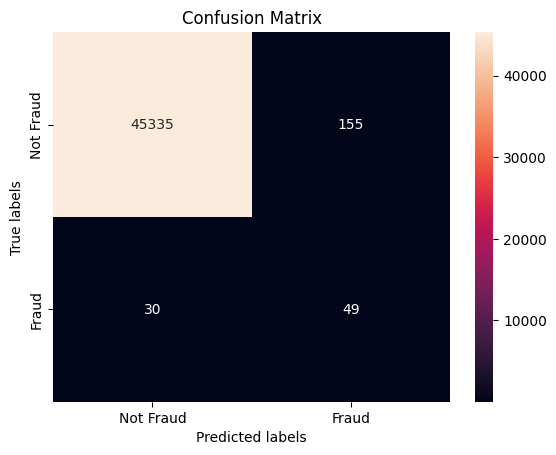

In [63]:
#LightGBM model on train data
import lightgbm as lgb

# create a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# train the model on the training data
lgb_model.fit(X_train, y_train)

# make predictions on the testing data
lgb_pred = lgb_model.predict(X_test)

# build confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_pred)

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lgb_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])


In [64]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.24      0.62      0.35        79

    accuracy                           1.00     45569
   macro avg       0.62      0.81      0.67     45569
weighted avg       1.00      1.00      1.00     45569



[Text(0, 0.5, 'Not Fraud'), Text(0, 1.5, 'Fraud')]

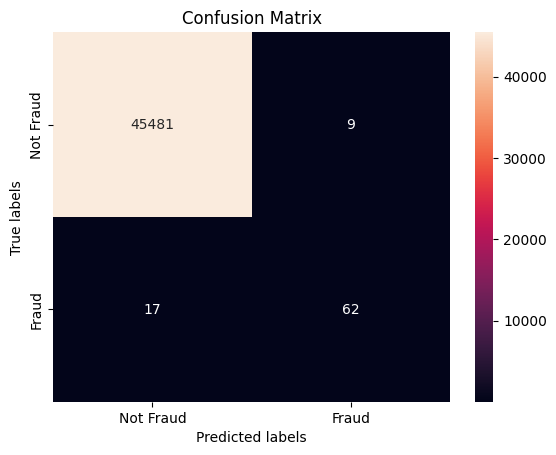

In [65]:
#oversample data on LightGBM
# train the model on the training data
lgb_model.fit(X_train_oversampled, y_train_oversampled)

# make predictions on the testing data
lgb_pred_os = lgb_model.predict(X_test)

# build confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_pred_os)

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lgb_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])


In [66]:
print(classification_report(y_test, lgb_pred_os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.87      0.78      0.83        79

    accuracy                           1.00     45569
   macro avg       0.94      0.89      0.91     45569
weighted avg       1.00      1.00      1.00     45569



[Text(0, 0.5, 'Not Fraud'), Text(0, 1.5, 'Fraud')]

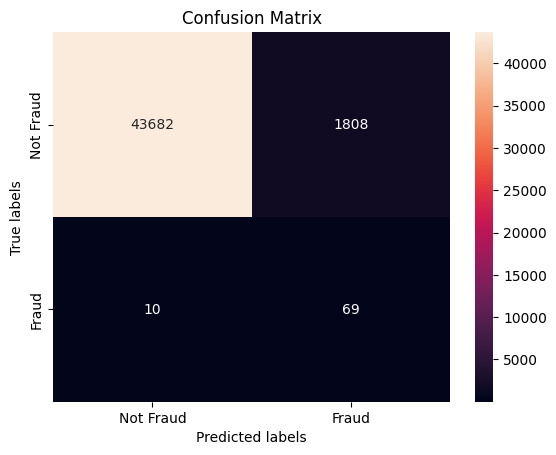

In [67]:
#undersample on LightGBM.

# train the model on the training data
lgb_model.fit(X_train_undersampled, y_train_undersampled)

# make predictions on the testing data
lgb_pred_us = lgb_model.predict(X_test)

# build confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_pred_us)

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lgb_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])


In [68]:
print(classification_report(y_test, lgb_pred_us))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45490
           1       0.04      0.87      0.07        79

    accuracy                           0.96     45569
   macro avg       0.52      0.92      0.53     45569
weighted avg       1.00      0.96      0.98     45569



[Text(0, 0.5, 'Not Fraud'), Text(0, 1.5, 'Fraud')]

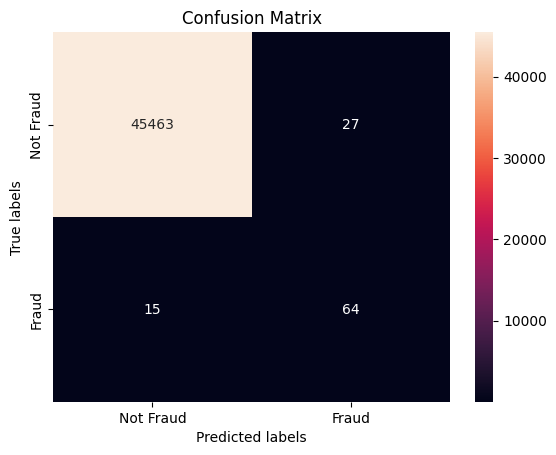

In [69]:
#Working with lightgbm SMOTE  technique.   

# train the model on the training data
lgb_model.fit(X_train_sm, y_train_sm)

# make predictions on the testing data
lgb_pred_sm = lgb_model.predict(X_test)

# build confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_pred_sm)

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lgb_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])


In [70]:
print(classification_report(y_test, lgb_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.70      0.81      0.75        79

    accuracy                           1.00     45569
   macro avg       0.85      0.90      0.88     45569
weighted avg       1.00      1.00      1.00     45569



In [71]:
#model dictionary
predicted_values_lightgbm = {"lightgbm": lgb_pred, "lightgbm OS": lgb_pred_os, "lightgbm US": lgb_pred_us, "lightgbm SMOTE": lgb_pred_sm}

#create df
df_lightgbm = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_lightgbm.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    df_lightgbm = pd.concat([df_lightgbm, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df_lightgbm = df_lightgbm.set_index('model')
df_lightgbm.head()

,precision,recall,f1_score
model,,,
lightgbm,0.240196,0.620253,0.346290
lightgbm OS,0.873239,0.784810,0.826667
lightgbm US,0.036761,0.873418,0.070552
lightgbm SMOTE,0.703297,0.810127,0.752941


In [72]:

#model dictionary
predicted_values_top = {"RandomForest": rand_f_pred, "RandomForest OS": rfm_OS_pred,"xgboost": xgb_pred, "xgboost OS": xgb_model_pred_os}

#create df
df_Final = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_top.items():
    precision = precision_recall_fscore_support(y_test, value, average=None)[0][1]
    recall = precision_recall_fscore_support(y_test, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(y_test, value, average=None)[2][1]
    df_Final = pd.concat([df_Final, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df_Final = df_Final.set_index('model')
df_Final.head()

,precision,recall,f1_score
model,,,
RandomForest,0.936508,0.746835,0.830986
RandomForest OS,0.934426,0.721519,0.814286
xgboost,0.937500,0.759494,0.839161
xgboost OS,0.939394,0.784810,0.855172


In [73]:
#transform Amount and Time for testing data
Res_X['Amount_scaled'] = pt_amount.transform(Res_X['Amount'].values.reshape(-1,1))
Res_X['Time_scaled'] = pt_time.transform(Res_X['Time'].values.reshape(-1,1))

Res_X = Res_X.drop(['Time', 'Amount'], axis=1)
Res_X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.051569,1.319756
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.331512,-1.687076
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.739519,-0.069561
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-1.539664,0.972007
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-1.386530,-1.182359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,-0.850483,...,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,0.310446,-0.997065
184616,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,-0.454388,...,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,1.495365,0.682215
274532,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,-1.734057,...,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,-0.144674,1.415095
269819,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,0.910437,...,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,-0.030887,1.374227


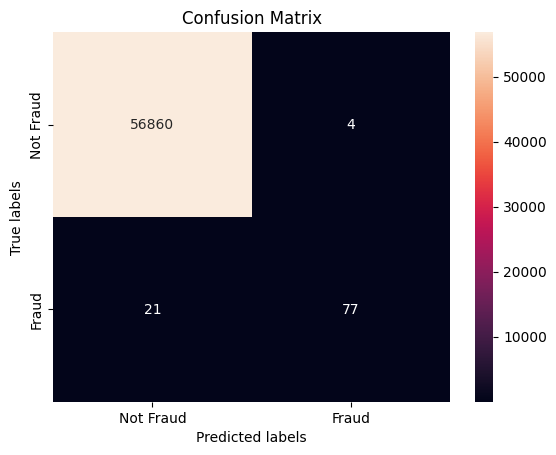

In [74]:
#Random forest for reserved 20 percent data. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rand_f = RandomForestClassifier(random_state=42)
rand_f.fit(X_train, y_train)
rand_f_pred_usd = rand_f.predict(Res_X)

#build confusion matrix
rand_f_cm = confusion_matrix(Res_y, rand_f_pred_usd)

ax= plt.subplot()
sns.heatmap(rand_f_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [75]:
print(classification_report(Res_y, rand_f_pred_usd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



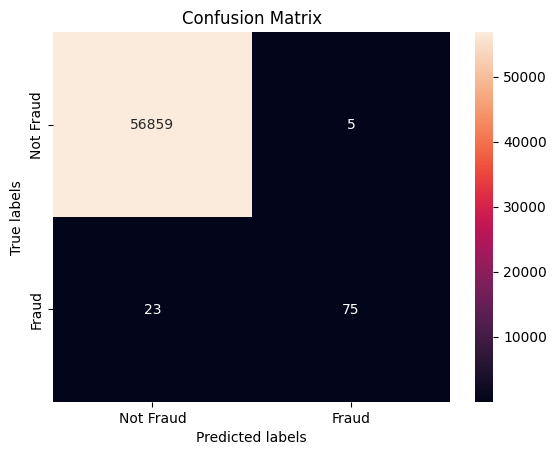

In [76]:
#Random forest  for reserved 20 percent data ,Trained on oversampled data. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rand_f = RandomForestClassifier(random_state=42)
rand_f.fit(X_train_oversampled, y_train_oversampled)
rfm_OS_pred_usd = rand_f.predict(Res_X)

#build confusion matrix
rand_f_cm = confusion_matrix(Res_y, rfm_OS_pred_usd)

ax= plt.subplot()
sns.heatmap(rand_f_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [77]:
print(classification_report(Res_y, rfm_OS_pred_usd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



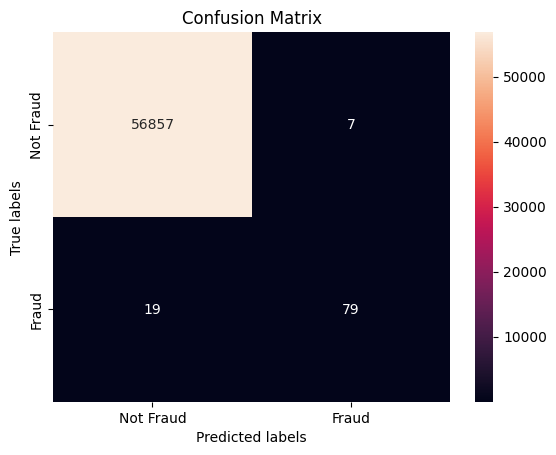

In [78]:
#Xgboost for original  data [unused data]

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

# make predictions on the testing data
xgb_pred_usd = xgb_model.predict(Res_X)

# build confusion matrix
xgb_cm = confusion_matrix(Res_y, xgb_pred_usd)


ax = plt.subplot()
sns.heatmap(xgb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); 
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [79]:
print(classification_report(Res_y, xgb_pred_usd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



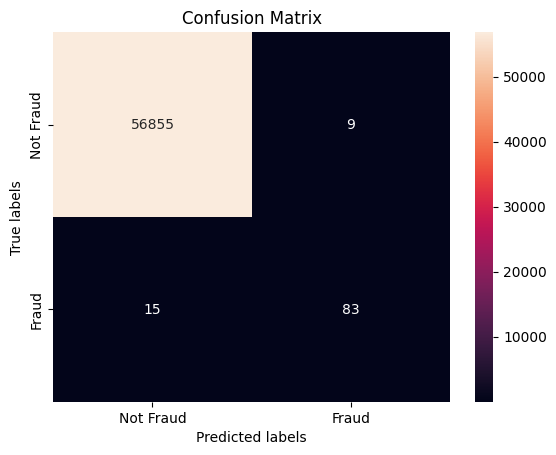

In [80]:
#Xgboost for oversampled data [unused data]

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_oversampled, y_train_oversampled)

# make predictions on the testing data
xgb_model_pred_os_usd = xgb_model.predict(Res_X)

# build confusion matrix
xgb_cm = confusion_matrix(Res_y, xgb_model_pred_os_usd)


ax = plt.subplot()
sns.heatmap(xgb_cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); 
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']);


In [81]:
print(classification_report(Res_y, xgb_model_pred_os_usd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [82]:
#Top model dictionary for unused data 

predicted_values_top_usd = {"RandomForest": rand_f_pred_usd, "RandomForest OS": rfm_OS_pred_usd,"xgboost": xgb_pred_usd, "xgboost OS": xgb_model_pred_os_usd}

#create df
df_Final_usd = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1_score'])

#plug precision recall and f1score into the dataframe for each model
for key, value in predicted_values_top_usd.items():
    precision = precision_recall_fscore_support(Res_y, value, average=None)[0][1]
    recall = precision_recall_fscore_support(Res_y, value, average=None)[1][1]
    f1_score = precision_recall_fscore_support(Res_y, value, average=None)[2][1]
    df_Final_usd = pd.concat([df_Final_usd, pd.DataFrame({'model': [key], 'precision': [precision], 'recall':[recall], 'f1_score':[f1_score]})])

df_Final_usd = df_Final_usd.set_index('model')
df_Final_usd.head()

,precision,recall,f1_score
model,,,
RandomForest,0.950617,0.785714,0.860335
RandomForest OS,0.937500,0.765306,0.842697
xgboost,0.918605,0.806122,0.858696
xgboost OS,0.902174,0.846939,0.873684


In [83]:
#X.count() #227845
#X_train.count()  #182276
#X_test.count() #45569
#Res_X.count() #56962